# Projeto Média Móvel

Remover estacionaridade, tendencia e tentar aproximar a série temporal de uma Gausiana

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import statsmodels.api as sm
from random import sample, random
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6


Origem dos dados:

1. https://www.seade.gov.br/coronavirus/#

2. https://github.com/seade-R/dados-covid-sp

3. https://www.seade.gov.br/

In [2]:
covid_df = pd.read_csv('dados_covid_sp.csv', sep = ';')
covid_df.head(3)

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9


In [3]:
covid_df.shape

(323000, 26)

In [4]:
covid_df.dtypes

nome_munic        object
codigo_ibge        int64
dia                int64
mes                int64
datahora          object
casos              int64
casos_novos        int64
casos_pc          object
casos_mm7d        object
obitos             int64
obitos_novos       int64
obitos_pc         object
obitos_mm7d       object
letalidade        object
nome_ra           object
cod_ra             int64
nome_drs          object
cod_drs            int64
pop                int64
pop_60             int64
area               int64
map_leg           object
map_leg_s        float64
latitude          object
longitude         object
semana_epidem      int64
dtype: object

In [5]:
covid_df['casos_mm7d'] = covid_df['casos_mm7d'].str.replace(',', '.')
covid_df['casos_mm7d'] = pd.to_numeric(covid_df['casos_mm7d'])
covid_df.head(3)

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.0,0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.0,0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.0,0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9


In [6]:
covid_df['obitos_mm7d'] = covid_df['obitos_mm7d'].str.replace(',', '.')
covid_df['obitos_mm7d'] = pd.to_numeric(covid_df['obitos_mm7d'])
covid_df.head(3)

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.0,0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.0,0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00",0.0,0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9


In [7]:
covid_df['casos_pc'] = covid_df['casos_pc'].str.replace(',', '.')
covid_df.head(3)

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,0.00000000000000e+00,0.0,0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,0.00000000000000e+00,0.0,0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,0.00000000000000e+00,0.0,0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9


In [8]:
# missing values
covid_df.isnull().sum()

nome_munic         0
codigo_ibge        0
dia                0
mes                0
datahora           0
casos              0
casos_novos        0
casos_pc           0
casos_mm7d         0
obitos             0
obitos_novos       0
obitos_pc          0
obitos_mm7d        0
letalidade         0
nome_ra          500
cod_ra             0
nome_drs         500
cod_drs            0
pop                0
pop_60             0
area               0
map_leg          500
map_leg_s        500
latitude           0
longitude          0
semana_epidem      0
dtype: int64

In [9]:
covid_df2 = covid_df.fillna(0)
covid_df2.isnull().sum()

nome_munic       0
codigo_ibge      0
dia              0
mes              0
datahora         0
casos            0
casos_novos      0
casos_pc         0
casos_mm7d       0
obitos           0
obitos_novos     0
obitos_pc        0
obitos_mm7d      0
letalidade       0
nome_ra          0
cod_ra           0
nome_drs         0
cod_drs          0
pop              0
pop_60           0
area             0
map_leg          0
map_leg_s        0
latitude         0
longitude        0
semana_epidem    0
dtype: int64

In [10]:
covid_df_saopaulo_city = covid_df2.loc[covid_df2.nome_munic == 'São Paulo',:]
covid_df_saopaulo_city.shape

(500, 26)

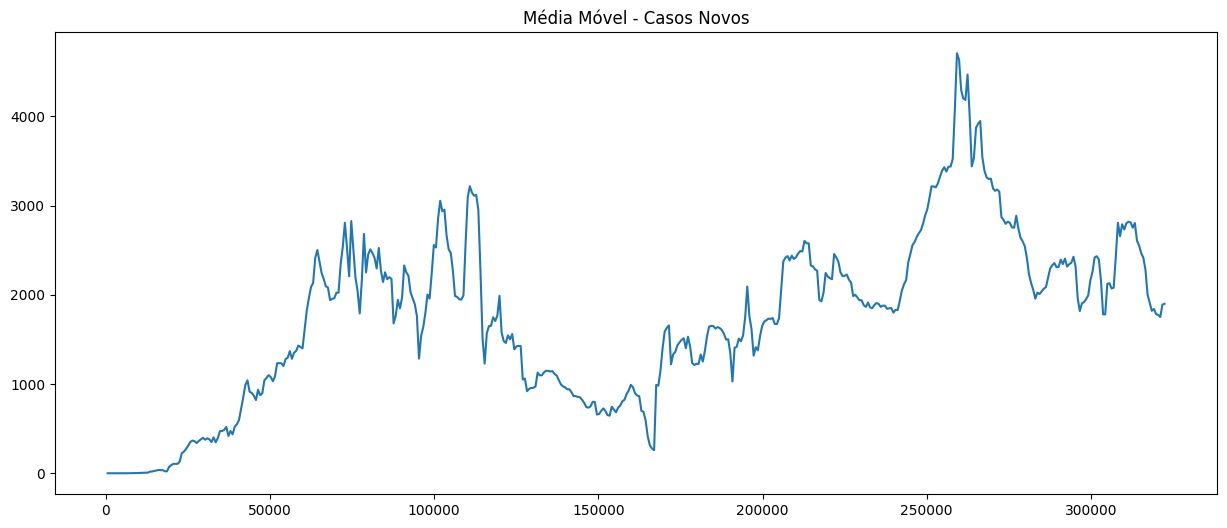

In [11]:
# Média móvel do Dataframe
plt.plot(covid_df_saopaulo_city.casos_mm7d)
plt.title('Média Móvel - Casos Novos')
plt.grid(False)
plt.show()

In [12]:
serie = pd.Series(covid_df_saopaulo_city['casos_novos'].values, index = covid_df_saopaulo_city['datahora'])


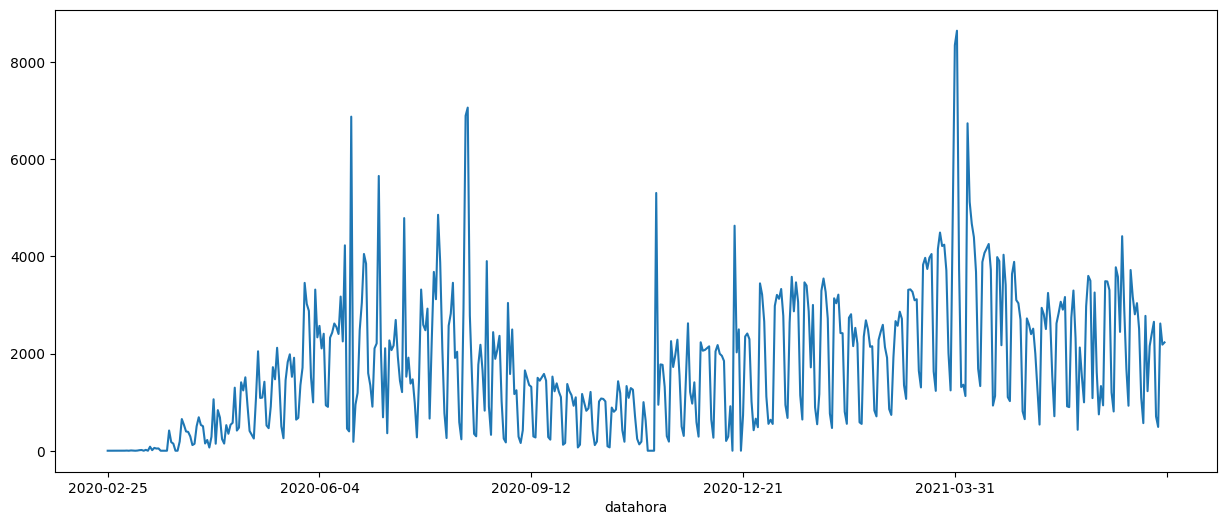

In [13]:
serie.plot()
plt.show()

In [14]:
media_casos = serie.rolling(window = 7)
media_casos = media_casos.mean()

[]

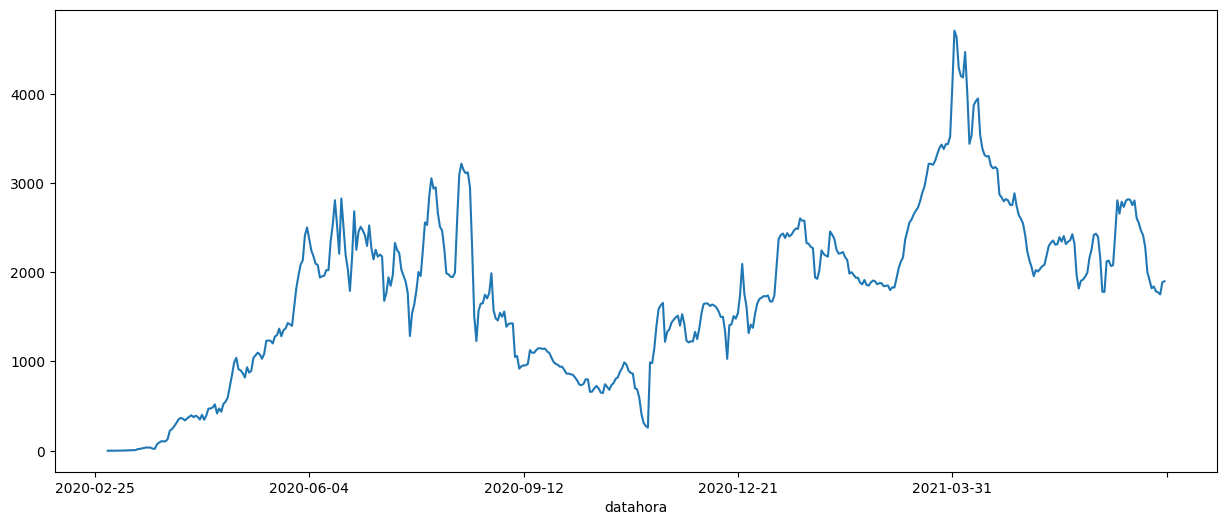

In [15]:
media_casos.plot()
plt.plot()

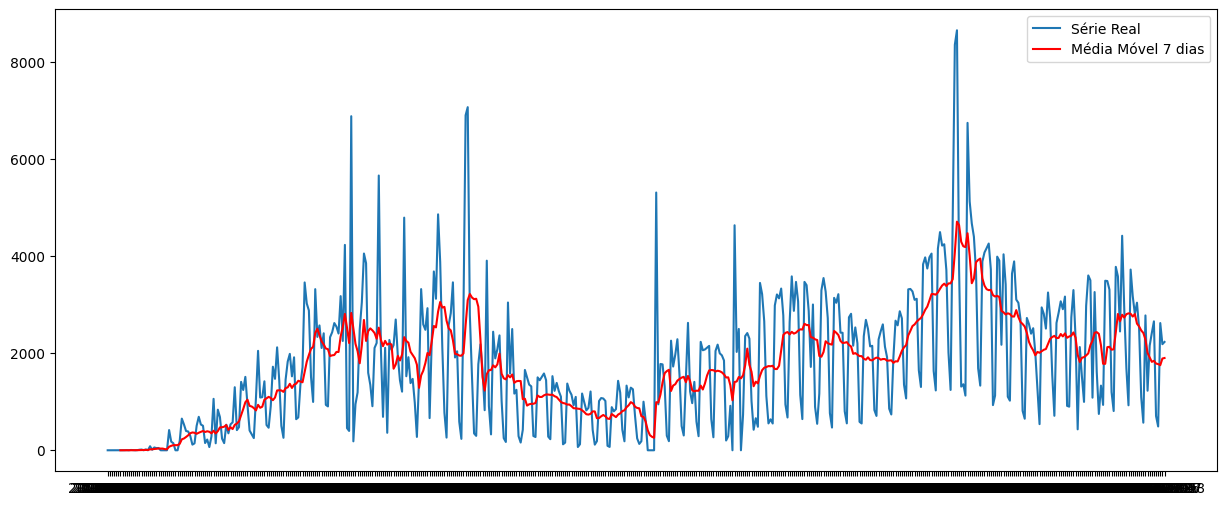

In [16]:
plt.plot(serie, label='Série Real')
plt.plot(media_casos,color='red', label='Média Móvel 7 dias')
plt.legend(loc='best')
plt.show()

## Média móvel casos de óbitos

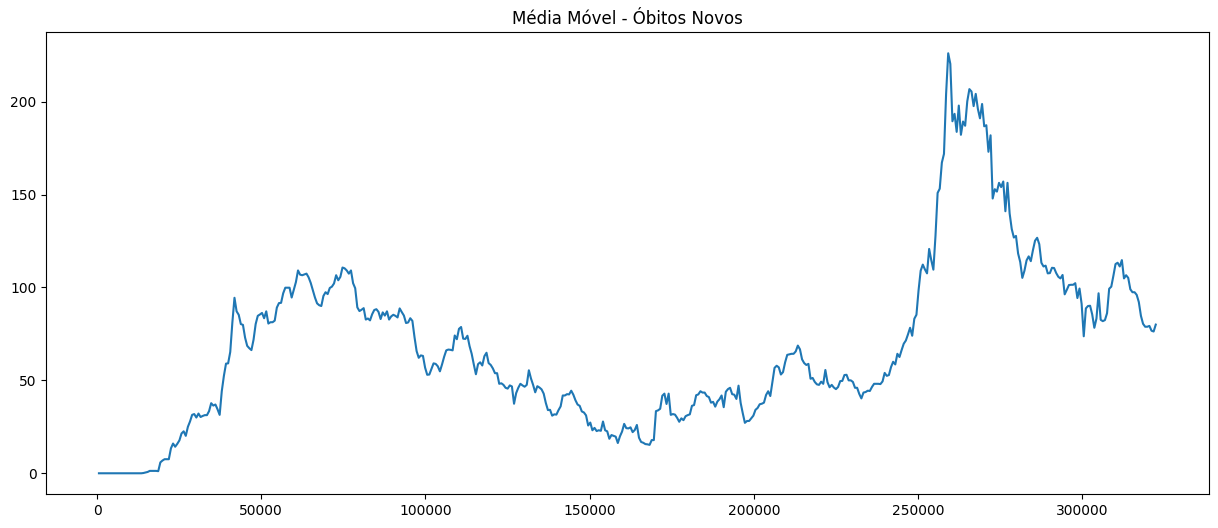

In [17]:
# Média móvel do Dataframe
plt.plot(covid_df_saopaulo_city.obitos_mm7d)
plt.title('Média Móvel - Óbitos Novos')
plt.grid(False)
plt.show()

In [18]:
serie_obitos = pd.Series(covid_df_saopaulo_city['obitos_novos'].values, index = covid_df_saopaulo_city['datahora'])

media_casos_ob = serie_obitos.rolling(window = 7)
media_casos_ob = media_casos_ob.mean()

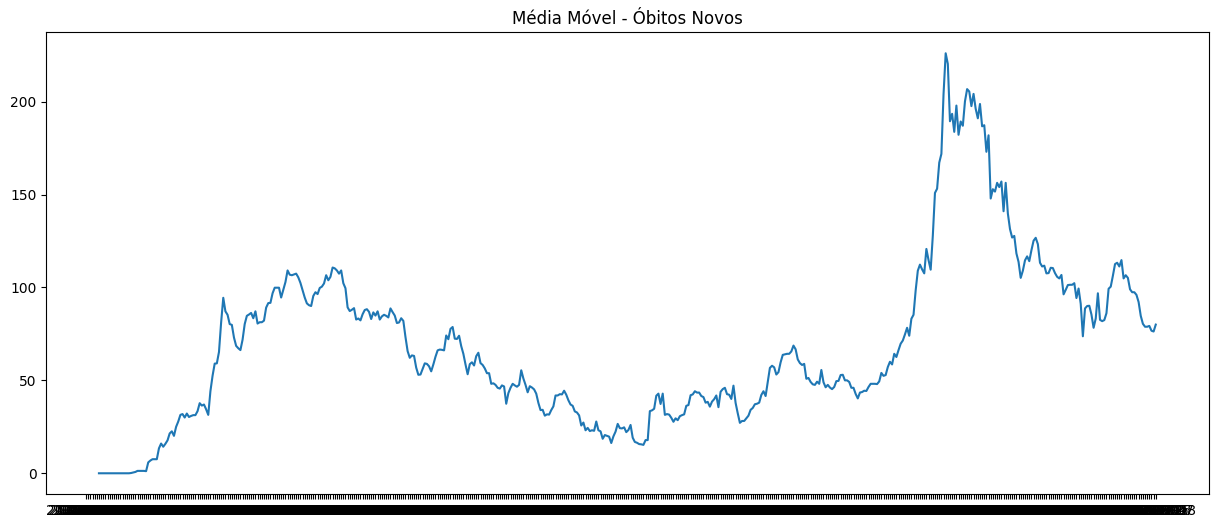

In [19]:
# Média móvel do Dataframe
plt.plot(media_casos_ob)
plt.title('Média Móvel - Óbitos Novos')
plt.grid(False)
plt.show()

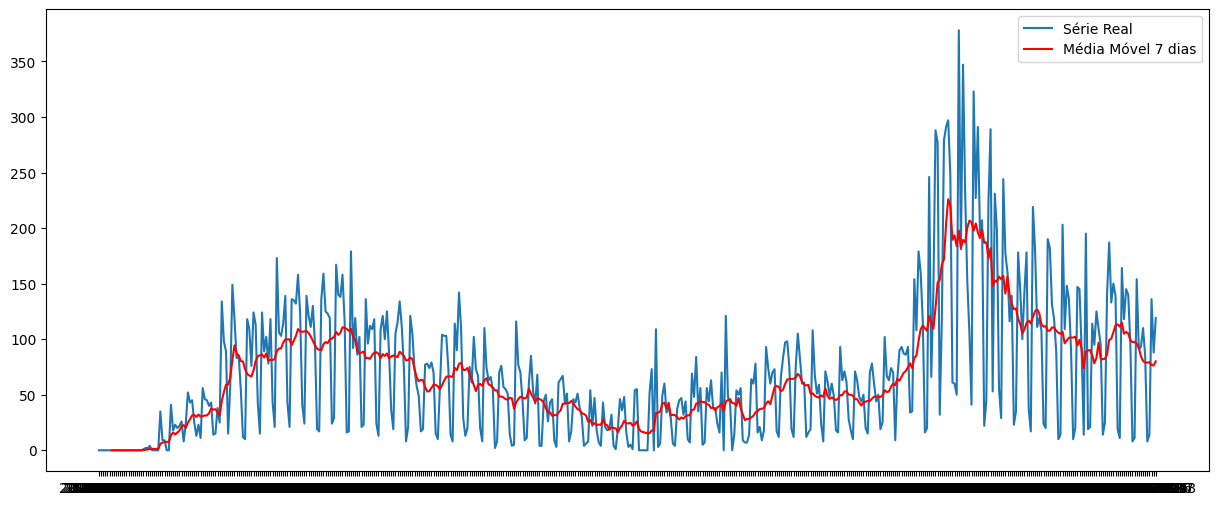

In [21]:
plt.plot(serie_obitos, label='Série Real')
plt.plot(media_casos_ob,color='red', label='Média Móvel 7 dias')
plt.legend(loc='best')
plt.show()